# Bandit Algorithms

## 1. ざっくりバンディットアルゴリズムとは

- 実データに基いてWebサイトなどの改善を行う手法の総称
- 活用（exploit）と探索（explore）の2つから成る
- さまざまなアルゴリズムが考案されている

バンディットの文脈では選択肢のことをアームと呼ぶ。

例：オンライン広告の場合<br> 
<br> 
ラウンド＝ユーザの訪問 <br> 
アーム＝広告 <br> 
報酬＝クリック <br> 
<br> 
報酬を最大化する行動選択とは、「総クリック数を最大化する広告選択」となる

## 2. A/Bテストとの違い

そもそもA/Bテストは<br>
- N種類のデザインを作ってユーザをランダムに振り分け、
- 一番良い結果を導き出した法を採用する

という手法のこと。「**データに基づいた**意思決定手法」.N=2である必要は無い。

- コンバージョン率
- サイト滞在時間

のような数値として計測できるものを用いる。

重要な要素として、バンディットアルゴリズムは<br>
**活用 （exploitation）と 探求 （exploration）**<br>
の２つから構成される。

活用は現時点で最もよいとされている腕を使うことであり、<br>
探求は候補の腕の中でどれが最も優れているかをテストすること.

A/Bテストは全てのユーザを**探求に割り振り、活用は行わない**。


## 3. バンディットアルゴリズムの評価指標

[1]Bandit Algorithms for Website Optimizationでは<br>
バンディットアルゴリズムの評価指標として下記が列挙されている。

- Curiosity<br>
 探求から得られた知見を利用するか。<br>一つ一つのテストは独立しているか否か。 
 
- Increased Exploitation over Time<br>
 自動的に探求の割合が減っていくか。 
 
- Strategic Exploration<br>
 何を最大化するか。<br>利益か、得られる知見か、それともその両方か。  
 
- Number of Tunable Parameters<br>
 調整が必要なパラメータ数
 
- Initialization Strategy<br>
 各腕に対する初期値の割り当て方
 
- Context-Aware<br>
 ユーザと腕の相性などを考慮するか。<br>例えば男性、女性を区別できるか、など。  

## 4. Epsilon-Greedyアルゴリズム

### 4-1. Epsilon-Greedyアルゴリズムとは

最も単純なバンディットアルゴリズムである Epsilon-Greedyアルゴリズム を確認する.

Epsilon-Greedyアルゴリズムの考え方は極めてシンプルで、<br>
$0 \leq \epsilon \leq1$を満たす$\epsilon$ に対して、<br>
全てのユーザの内**$1 - \epsilon$ は活用、$\epsilon$は探求を行う**.

そして探求に割り当てられたユーザをテストしたい腕に改めて<br>
割り振る。<br>
この$\epsilon$ の値を調整することで、活用と探求の割合を増減させることができる。

- $\epsilon = 0$ の場合探求は一切行われない -> これはバンディットアルゴリズムを使っていないのと同じ。
- $\epsilon$ を少しずつ増やしていくと、次第に探求の割合が増えていく。

6つの評価指標に照らすと、いくつもの欠点があることが分かる。

- Curiosity<br>
 常に全ての腕が選ばれる確率が等しい。
 
- Increased Exploitation over Time<br>
 探求の割合は一定で、減少しない。
 
- Strategic Exploration<br>
 文脈による
 
- Number of Tunable Parameters<br>
 調整が必要なパラメータ数$\epsilon$の一つのみ。
 
- Initialization Strategy<br>
 全ての腕が同じ評価
 
- Context-Aware<br>
 コンテキストは一切考慮しない

この方策はシンプルで判りやすいが、<br>
**最適な探索回数を見つけるのが困難**という課題があり、<br>
探索と活用のバランスをうまく調整できないと次のような問題が生じる.

- 探索が少ない　→　活用時に最適でないアームを引き続ける可能性がある
- 探索が多い　　→　最適でないアームを余分に引いてしまう



### 4-2. バンディット問題と確率分布

アームの報酬確率分布が何らかの族に入っていることを仮定する。

例１：Bernoulli分布族（確率$\mu_i$ で報酬1, 確率$1 - \mu_i$ で報酬0, １パラメータの推定） 

例２：正規分布族（平均と分散の２パラメータを推定） 

オンライン広告の場合はBernoulli分布族（ク リック/非クリックの２値のため）

以下の実装例では、簡単のためBernoulli分布族を仮定する。

### 4-3. Epsilon-Greedyアルゴリズム　実装サンプル

方策として(1)ランダム選択 をした場合と、(2)Epsilon-Greedyアルゴリズム を選択した<br>
場合の獲得報酬の推移を比べてみる。

実験では10本のアームを合計で8,000回選ぶ中で累積報酬を最大化すること<br>
が目的です.

前提として、獲得報酬は0/1のベルヌーイ分布に従い、パラメータpはそれぞれ以下のように<br>
設定する。（プレイヤーはこの情報を知らない）

|アーム|	1|	2|	3|	4|	5|
|--|--|
|確率|	5.4%|	6.9%|	8.0%|	9.7%|	11.2%|
|アーム|	6|	7|	8|	9|	10|
|確率|	11.9%|	12.1%|	14.4%|	15.5%|	17.4%|

例えば全てアーム1を選択した場合、<br>
報酬を受け取る回数の期待値は（0.054 × 8,000回）になり、

全てアーム10（最適なアーム）を選択した場合、<br>
報酬を受け取る回数の期待値は（0.174 × 10,000回）になる.

In [1]:
import numpy as np
import random

# アームクラス
class BernoulliArm():
 
    def __init__(self, p):
        self.p = p
 
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

# 選択アルゴリズム：ランダム選択
class random_select():
 
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
 
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
 
    def select_arm(self):
        return random.randint(0, len(self.values) - 1)
 
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        
    def getLabel(self):
        return "Random"

# 選択アルゴリズム：Epsilon-Greedy
class EpsilonGreedy():
 
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
 
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
 
    def select_arm(self):
        if random.random() > self.epsilon:
            # exploitation 最大値をとるアームを選択
            return np.argmax(self.values)
        else:
            # exploration ランダムに探索するだけ
            return random.randint(0, len(self.values) - 1)
 
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value

    def getLabel(self):
        return "Epsilon\nGreedy"

# アルゴリズム実行
def test_algorithm(algo, arms, num_sims, time):
    ## args
    # algo アルゴリズムクラス
    # arms アームクラス
    # num_sims  シミュレーション回数
    # time 試行回数
    
    chosen_arms = np.zeros(num_sims * time)
    cumulative_rewards = np.zeros(num_sims * time)
    times = np.zeros(num_sims * time)
    for sim in range(num_sims):
        algo.initialize(len(arms))
        for t in range(time):
            index = sim * time + t
            times[index] = t + 1
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arm].draw()
            if t == 0:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[
                    index - 1] + reward
            algo.update(chosen_arm, reward)
    return [times, chosen_arms, cumulative_rewards]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def diff_algorithms(algo_ary, arms, sim_num, time, colors = sns.color_palette()[:3]):
    ## args
    # algo_ary アルゴリズム配列
    # arms アーム配列
    # sim_num シミュレーション数
    # time  試行回数

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    heights = []
    random.seed(2017)
    # アーム数
    n_arms = arms.size

    for algo in algo_ary:
        algo.initialize(n_arms)
        result = test_algorithm(algo, arms, sim_num, time)

        df_result = pd.DataFrame({"times": result[0], "chosen_arms": result[1]})
        df_result["best_arms"] = (df_result["chosen_arms"]
                                  == np.argmax(means)).astype(int)
        grouped = df_result["best_arms"].groupby(df_result["times"])

        ax1.plot(grouped.mean(), label=algo.__class__.__name__)
        heights.append(result[2][-1])

    ax1.set_title("Best Arm Rate")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Best Arm Rate")
    ax1.legend(loc="upper left")

    plt_label = []
    for algo in algo_ary:
        plt_label.append(algo.getLabel())

    ax2.bar(range(1, len(algo_ary) + 1), heights, color=colors, align="center")
    ax2.set_xticks(range(1, len(algo_ary) + 1))
    ax2.set_xticklabels(plt_label)
    ax2.set_label("random_select")
    ax2.set_ylabel("Cumulative Rewards")
    ax2.set_title("Cumulative Rewards")
    plt.show()

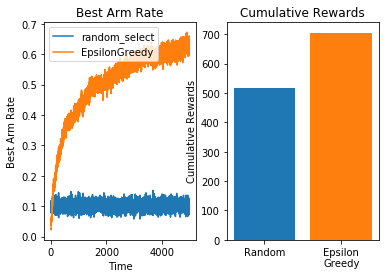

In [4]:
epsilon = 0.2  # パラメータ
means = [0.054,  0.069,  0.080,  0.097,  0.112,
         0.119,  0.121,  0.144,  0.155,  0.174]
sim_num = 500  # シミュレーション回数
time = 5000  # 試行回数
arms = pd.Series(map(lambda x: BernoulliArm(x), means))

algo_1 = random_select([], [])           # random
algo_2 = EpsilonGreedy(epsilon, [], [])  # epsilon-greedy
algo_ary = [algo_1, algo_2]

diff_algorithms(algo_ary, arms, sim_num, time, colors = sns.color_palette()[:3])

左が獲得報酬の平均の推移、右が累積報酬の推移です

乱数選択の場合は報酬が上がらず、ほぼ一定ですが、<br>
epsilon-greedy の場合は報酬が上がっていることが確認できる.

## ５. UCB1 アルゴリズム

累積報酬を最大化するためには最適なアームを多く引いていくことが重要ですが、<br>
選択回数が少ないアームについては報酬が正確に推定できていない可能性を考慮する必要があります。

これらのバランスをとれる方策としてUCB1（Upper Confidence Bound）方策がある。

この方策では、アームを選択する際に毎回以下の式で表されるスコアを算出し、<br>
最もスコアの高いアームを引きます。

$\bar{\mu}_{i}(t)$ ：時刻tのアームiのスコア

$\hat{\mu}_{i}(t)$ ：時刻tのアームiの標本平均

$N_{i}(t)$ ：時刻tまでのアームiの選択回数

$\bar{\mu}_i(t)=\hat{\mu}_i(t)+\sqrt{\frac{\log t}{2N_i(t)}}
$

(1)獲得報酬/選択総数＋(2)sqrt(選択総数/(2*アーム選択回数))

標本平均(1)「＝活用」に補正項(2)「＝探索」を加えた値がスコアであり、<br>
**選択数 $N_{i}(t)$ が少ないアームほど補正項の値は大きく** なります。<br>
そのため標本平均は小さいが、選択回数が少ないアームも選ばれることがあります。

つまり、単純に標本平均の大きなアームが選択される時は活用が行われ、<br>
**標本平均は小さいが、選択回数が少ないアームが選択される時は探索が行なわれている**<br>
と言える。

このようにUCB方策では探索と活用のバランスをうまくとりながら<br>
アームの選択を行い、報酬の最大化を目指す.

## 6. Thompson Sampling アルゴリズム

Thompson Samplingとはベイズ統計の枠組みを利用し、<br>
「そのアームが最適なアームである確率」に注目した方策です.

アーム$i$ の期待値のパラメータ$\mu_i$ が何らかの事前分布$\pi_i(\mu_i)$ から生成されるとし、<br>
時刻$t$ までの観測${\cal H} (t)$ が得られたときの期待値$\mu_i$ の事後分布を考えます。

「アーム$i$ が最適」という命題は、<br>
「ある$x$で$\mu_i=x$、かつすべての$j\neq i$で$\mu_j\leq x$」<br>
と解釈でき、数式を用いると以下のように表現できます。

$
\displaystyle\pi(\mu_i = \mu^* |{\cal H} (t)) = \int \pi(x_i|{\cal H} (t))\left(\prod_{j\neq i}\int_{x_j\leq x_i}\pi_j(x_j|{\cal H} (t))dx_j\right)dx_i
$

この式を各アームについて計算し事後確率を比較すれば良いのですが、<br>
一般にこの式を計算することは困難なことが知られています。

しかし実際に事後確率を直接比較する必要はなく、以下の手続きを行うことで<br>
「期待値最大の事後確率」に基づいたアームの選択を実現することができます。

①各アームの期待値の事後分布$\pi(x_i|{\cal H}(t))$ から乱数$\tilde{\mu}_i$ を生成

②$\tilde{\mu}_i$ を最大にするアーム$i$ を引く

Thompson Sampling方策はUCB方策に比べて余分な探索が少なくなることが知られていて、<br>
有限の試行回数でより良い性能を達成することができます。

## 7. 方策比較実験

以下では、ε-greedy方策、UCB方策、Thompson Sampling方策<br>
の比較実験を行います。

In [5]:
# 選択アルゴリズム：UCB
class UCB():
 
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
 
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
 
    def select_arm(self):
        n_arms = len(self.counts)
        if min(self.counts) == 0:
            return np.argmin(self.counts)

        # (1)獲得報酬/選択総数 total_counts ＋(2)sqrt(選択総数 total_counts/(2*アーム選択回数 self.counts))
        total_counts = sum(self.counts)
        bonus = np.sqrt((np.log(np.array(total_counts))) /
                        2 / np.array(self.counts))
        ucb_values = np.array(self.values) + bonus
        return np.argmax(ucb_values)
 
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value

    def getLabel(self):
        return "UCB"

        
# 選択アルゴリズム：Thompson Sampling
class ThompsonSampling():
 
    def __init__(self, counts_alpha, counts_beta, values):
        self.counts_alpha = counts_alpha
        self.counts_beta = counts_beta
        self.alpha = 1
        self.beta = 1
        self.values = values
 
    def initialize(self, n_arms):
        self.counts_alpha = np.zeros(n_arms)
        self.counts_beta = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
 
    def select_arm(self):
        theta = [(arm,
                  random.betavariate(self.counts_alpha[arm] + self.alpha,
                                     self.counts_beta[arm] + self.beta))
                 for arm in range(len(self.counts_alpha))]
        theta = sorted(theta, key=lambda x: x[1])
        return theta[-1][0]
 
    def update(self, chosen_arm, reward):
        if reward == 1:
            self.counts_alpha[chosen_arm] += 1
        else:
            self.counts_beta[chosen_arm] += 1
        n = float(self.counts_alpha[chosen_arm]) + self.counts_beta[chosen_arm]
        self.values[chosen_arm] = (n - 1) / n * \
            self.values[chosen_arm] + 1 / n * reward
            
    def getLabel(self):
        return "Tompson \nSampling"

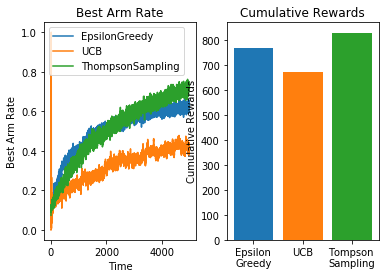

In [6]:
algo_2 = EpsilonGreedy(epsilon, [], [])  # epsilon-greedy
algo_3 = UCB([], [])                    # UCB
algo_4 = ThompsonSampling([], [], [])   # ThompsonSampling
algo_ary = [algo_2, algo_3, algo_4]

diff_algorithms(algo_ary, arms, sim_num, time, colors = sns.color_palette()[:4])

### 実験の考察

左図は横軸が試行回数、縦軸が最適なアームを選択した割合

- 実験で最も累積報酬が高かったのはThompson Sampling方策<br>
  ８０％以上の正答率で最適アームを終盤は選択していることが分かる
<br><br>
- ε-greedy方策とUCB1方策について<br>
最適腕の選択割合（左図）ではε-greedy方策が割合が高いが<br>
累積報酬（右図）ではUCB方策の方が多く報酬を獲得している<br>
  <br>
これは探索時にアームをランダムに選択するε-greedy方策と比べ、<br>
UCB方策は**アームごとのUCBスコアに基づいて**アームを選択することで<br>
悪いアームの選択回数を抑え、全体として**比較的期待値の高いアームを多く引いた**ため<br>
と考えられる
    
実際には、「報酬最大化」のみならず、計算効率についても考慮する必要がある。

ここで取り上げた方策以外にも提案されているものがあるので、別の機会に調査する。


## 参考文献

[1]Bandit Algorithms for Website Optimization: Developing, Deploying, and Debugging<br>
https://www.amazon.co.jp/gp/product/B00AM86Y0K/

[2]A/Bテストよりすごい？バンディットアルゴリズムとは一体何者か<br>
https://qiita.com/yuku_t/items/6844aac6008911401b19

[3]20 lines of code that will beat A/B testing every time<br>
http://stevehanov.ca/blog/index.php?id=132